<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/CNN_Sentence_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN을 이용한 문장분류(classification)
- 각 단어가 행으로, 행의 길이는 제일 긴 단어의 길이로 맞추고 나머지는 0으로 채움

In [42]:
from tensorflow.keras.models                 import Sequential, Model
from tensorflow.keras.layers                 import Activation , Dense , BatchNormalization , Dropout ,Flatten, Embedding, Reshape, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D , AveragePooling1D, AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Input, concatenate
from tensorflow.keras.optimizers             import SGD , Adam , RMSprop
from tensorflow.keras.utils                  import plot_model , to_categorical
from tensorflow.keras.callbacks              import EarlyStopping , ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn  import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score


import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import seaborn           as sns


# dataset
from tensorflow.keras.datasets                 import imdb
# from tensorflow.keras.datasets               import cifar10 , mnist
# from tensorflow.keras.datasets.mnist         import load_data
# from tensorflow.keras.datasets.fashion_mnist import load_data
# from sklearn.datasets                        import load_breast_cancer
# from sklearn.datasets                        import load_digits



In [6]:
# 빈도수가 높은 데이터들만 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
X_train[0] # 문장
y_train[0] # 긍정 or 부정

In [9]:
# 문장의 최대 길이는 300이고, 300이 안되는 문장들은 0으로 채움
X_train = pad_sequences(X_train, maxlen=300)
X_test  = pad_sequences(X_test, maxlen=300)

In [11]:
X_test.shape, X_train.shape, y_train.shape, y_test.shape

((25000, 300), (25000, 300), (25000,), (25000,))

In [22]:
# Conv1D

def sentence_cnn_1d() :
    model = Sequential()

    # feature extraction
    model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
    model.add(Conv1D(filters=50, kernel_size=5, strides=1, padding='valid'))
    model.add(MaxPooling1D(2, padding='valid'))
    model.add(Flatten())

    # classification
    model.add(Dense(10))
    model.add(Activation('relu'))

    # output
    model.add(Dense(1))
    model.add(Activation('sigmoid')) # <--이진분류, 확률:softmax

    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [23]:
model = sentence_cnn_1d()

In [24]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=100, verbose=1)

400/400 [==============================] - 5s 12ms/step - loss: 3.7705e-06 - accuracy: 1.0000 - val_loss: 1.4274 - val_accuracy: 0.8522
Epoch 87/100
400/400 [==============================] - 5s 13ms/step - loss: 3.0670e-06 - accuracy: 1.0000 - val_loss: 1.4469 - val_accuracy: 0.8522
Epoch 88/100
400/400 [==============================] - 5s 13ms/step - loss: 2.4291e-06 - accuracy: 1.0000 - val_loss: 1.4668 - val_accuracy: 0.8520
Epoch 89/100
400/400 [==============================] - 5s 13ms/step - loss: 1.9442e-06 - accuracy: 1.0000 - val_loss: 1.4863 - val_accuracy: 0.8518
Epoch 90/100
400/400 [==============================] - 5s 12ms/step - loss: 1.5262e-06 - accuracy: 1.0000 - val_loss: 1.5048 - val_accuracy: 0.8520
Epoch 91/100
400/400 [==============================] - 5s 12ms/step - loss: 1.2698e-06 - accuracy: 1.0000 - val_loss: 1.5246 - val_accuracy: 0.8518
Epoch 92/100
400/400 [==============================] - 5s 12ms/step - loss: 9.6925e-07 - accuracy: 1.0000 - val_loss: 

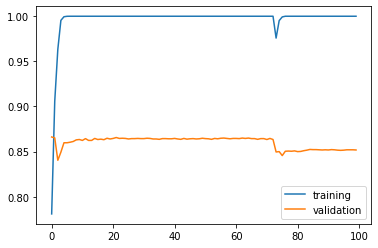

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [26]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])

782/782 [==============================] - 3s 4ms/step - loss: 1.6741 - accuracy: 0.8510
Test accuracy :  0.8510000109672546


In [34]:
# Conv2D

def sentence_cnn_2d() :
    model = Sequential()

    # feature extraction
    model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
    model.add(Reshape((300, 100, 1), input_shape=(300, 100)))
    model.add(Conv2D(filters=50, kernel_size=(5, 100), strides=(1, 1), padding='valid'))
    model.add(GlobalMaxPooling2D()) # Global은 Flatten을 하지 않아도 됨

    # classification
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    # output
    model.add(Dense(1))
    model.add(Activation('sigmoid')) # <--이진분류, 확률:softmax

    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:
model = sentence_cnn_2d()
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=10, verbose=1)

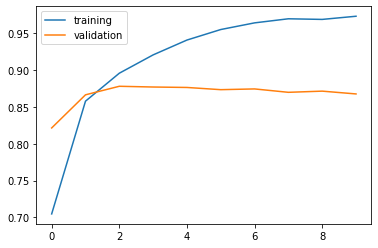

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [37]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])

782/782 [==============================] - 7s 8ms/step - loss: 0.5552 - accuracy: 0.8676
Test accuracy :  0.8676000237464905


### Dropout, Batch Normalization --> 안정화

In [40]:
# Conv2D
# 합성곱 연산을 적용하는 연산을 여러개 만들어서 성능개선

def conv_ary() :
    conv_layer_ary = []
    inn = Input(shape=(300, 100, 1))
    for 
        conv = Conv2D()
        act  = Activation('relu')(conv)
        pool = MaxPooling2D()(act)

        conv_layer_ary.append(pool)

    out = concatenate(conv_layer_ary)
    model = Model(inputs = inn, outputs = out)
    return model



def improve_sentence_cnn_2d() :
    model = Sequential()

    # feature extraction
    model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
    model.add(Reshape((300, 100, 1), input_shape=(300, 100)))
    model.add(Dropout(0.5))

    model.add(conv_ary())

    model.add(Flatten())

    # classification
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(10))
    model.add(BatchNormalization)
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    # output
    model.add(Dense(1))
    model.add(Activation('sigmoid')) # <--이진분류, 확률:softmax

    # compile
    adam = Adam(lr = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

SyntaxError: ignored

In [ ]:
model = improve_sentence_cnn_2d()
model.summary()

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history   = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=20, verbose=1, callbacks=callbacks)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])